Author: Adam Moss

Data from 

https://www.england.nhs.uk/statistics/statistical-work-areas/covid-19-hospital-activity/ 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime
import requests
import os
import sys

In [2]:
path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,path)

In [3]:
from covid.utils import get_covid_activity

In [4]:
colors = ['#006FED', '#E03424', 'gray', '#009966', '#000866', '#336600', '#006633', 'm', 'r']

In [5]:
covid_activity = get_covid_activity()

In [6]:
covid_activity

,date,areaName,hospitalCases,covidOccupiedMVBeds
0,2020-08-01,ENGLAND,879,74
1,2020-08-02,ENGLAND,847,72
2,2020-08-03,ENGLAND,842,67
3,2020-08-04,ENGLAND,807,65
4,2020-08-05,ENGLAND,805,63
...,...,...,...,...
1267,2021-01-02,South West,1236,79
1268,2021-01-03,South West,1323,83
1269,2021-01-04,South West,1401,97
1270,2021-01-05,South West,1414,98


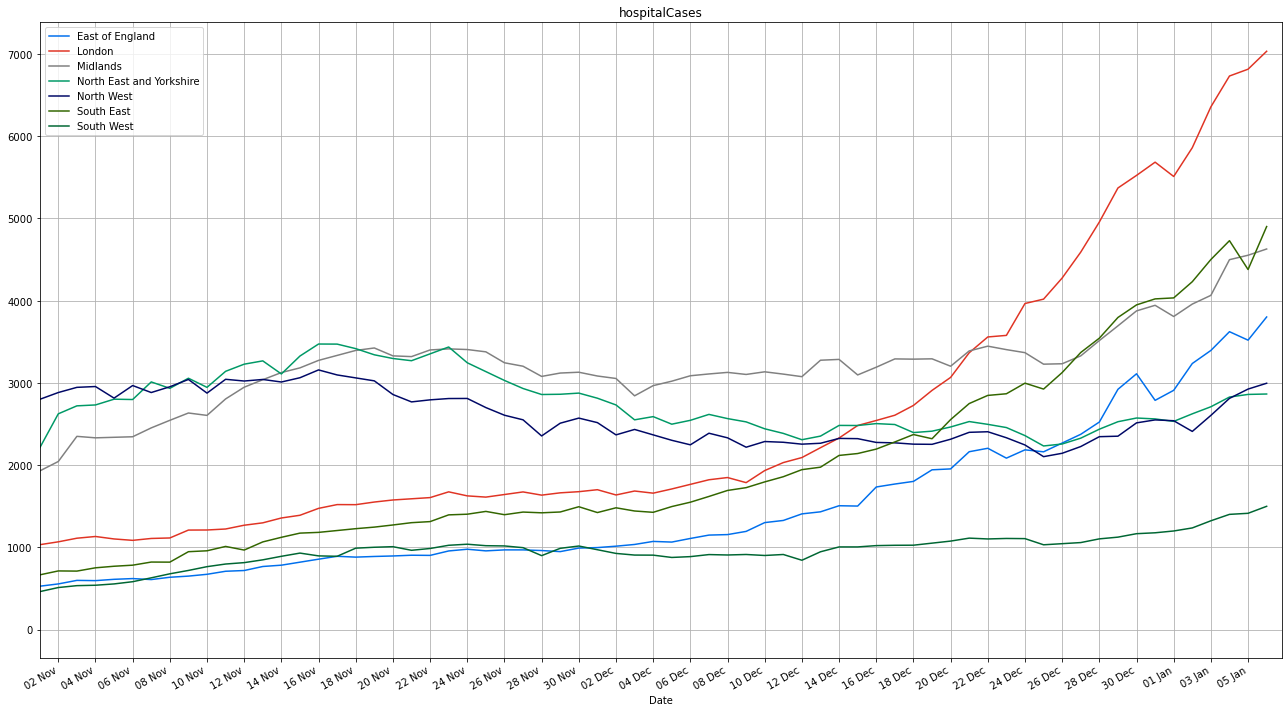

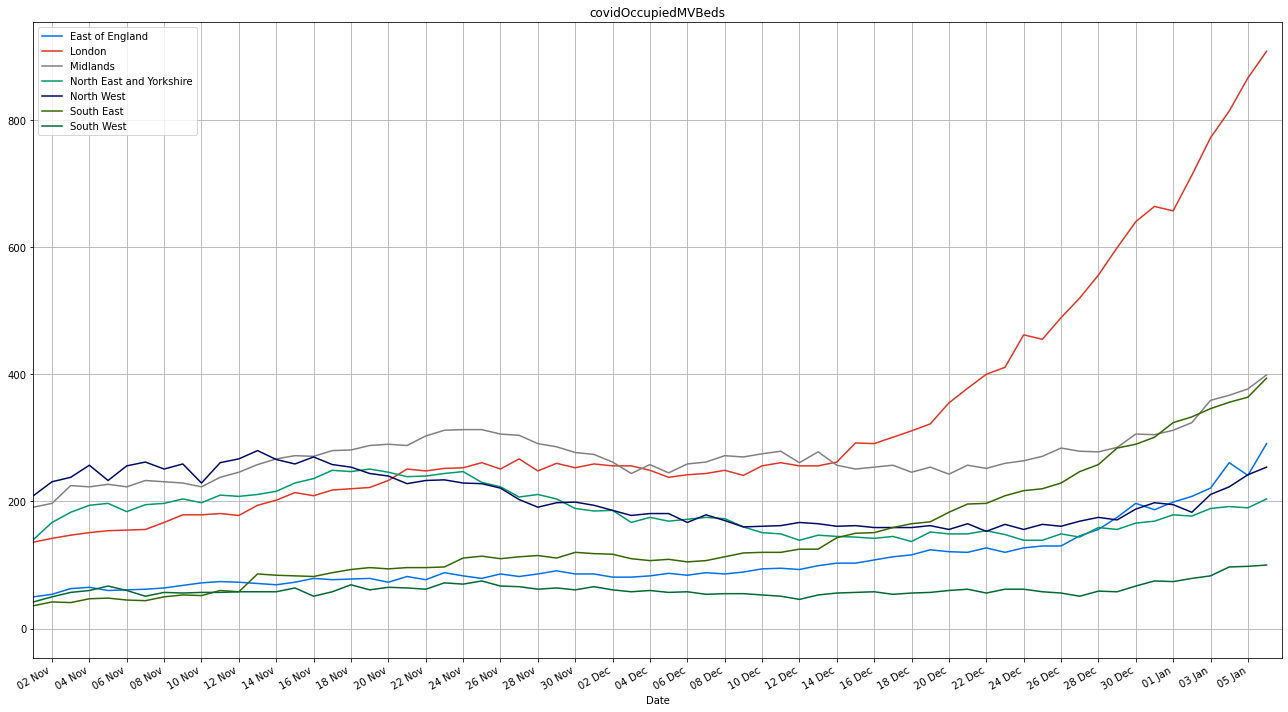

In [7]:
for metric in ['hospitalCases', 'covidOccupiedMVBeds']:
    plt.figure(figsize=(18,10))
    for i, region in enumerate(covid_activity['areaName'].unique()[1:]):
        covid_activity_region = covid_activity[covid_activity['areaName'] == region]
        plt.plot(covid_activity_region['date'], covid_activity_region[metric], label=region, color=colors[i])
    plt.title(metric)
    plt.legend()
    plt.xlabel('Date')
    ax = plt.gca()
    ax.set_xlim([datetime.datetime(2020, 11, 1), datetime.datetime.now()])
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
    plt.gcf().autofmt_xdate() # Rotation
    plt.grid()
    plt.tight_layout()
    plt.savefig('plots/occupancy/' + metric, transparent=False, facecolor='white')

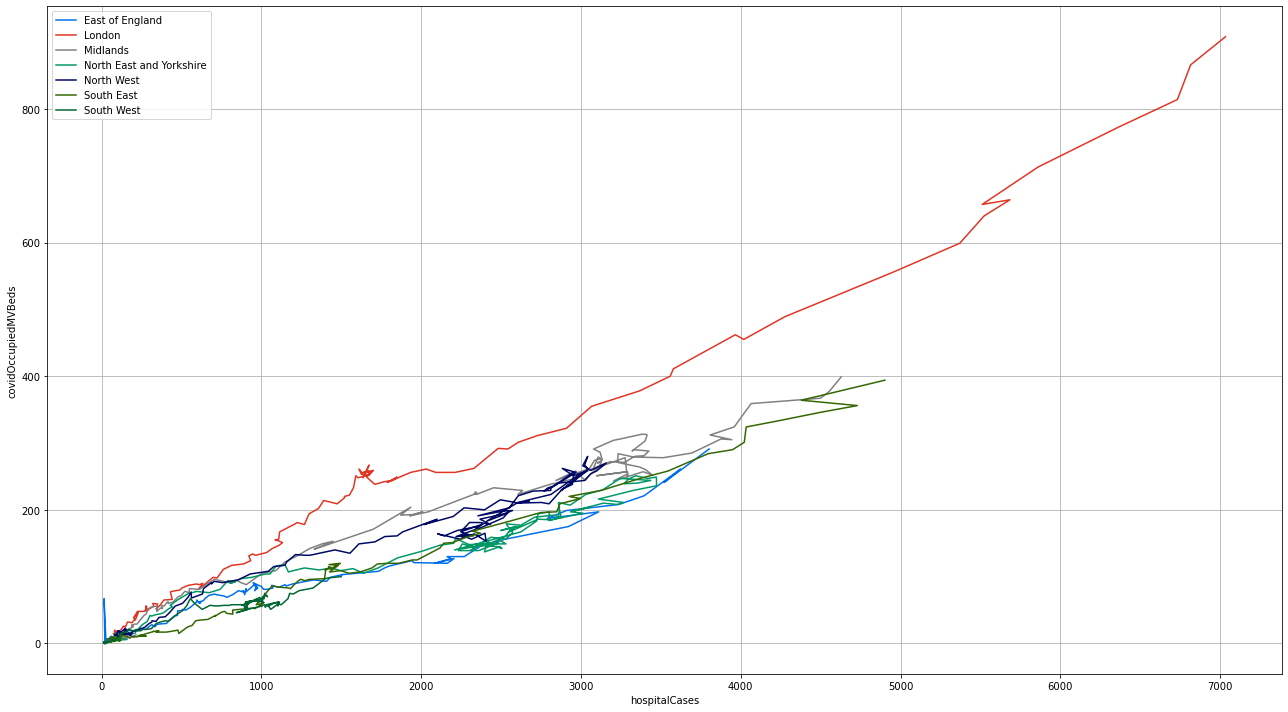

In [8]:
plt.figure(figsize=(18,10))
for i, region in enumerate(covid_activity['areaName'].unique()[1:]):
    covid_activity_region = covid_activity[covid_activity['areaName'] == region]
    plt.plot(covid_activity_region['hospitalCases'], covid_activity_region['covidOccupiedMVBeds'], label=region, color=colors[i])
plt.legend()
plt.xlabel('hospitalCases')
plt.ylabel('covidOccupiedMVBeds')
ax = plt.gca()
plt.grid()
plt.tight_layout()
plt.savefig('plots/occupancy/hospitalCases_covidOccupiedMVBeds', transparent=False, facecolor='white')